<h1>LN - Coursera Capstone Project - The Battle of Neighborhoods (Week 2)</h1>
<h2> To explore and analyze. The venues of neighborhoods of New York City and City of Toronto Using Four Square Venue data</h2>
<h4>by Lakshminarayana LNEPDS019@gmail.com</h4>

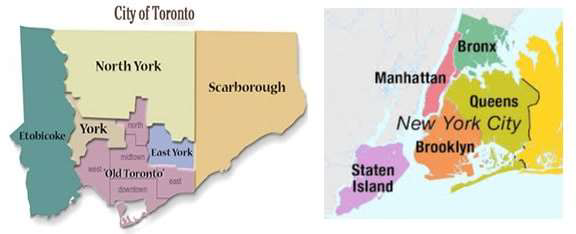

<p>Lets start</p>

<h3>Table of Contents</h3>
<p> 1. Introduction
<p> 2. Data Source and Cleaning
<p> 3. Methodology and Exploratory Data Analysis
<p> 4. Results and Discussion
<p> 5. Conclusion

<h3>Introduction</h3>

<p>To explore and analyze, the venues of the neighborhoods of New York City and City
of Toronto using Four Square Venue data to ensure the ease of decision making.</p>
<h4>Background</h4>
<p>At times when we are visiting or moving to a new city, it becomes very difficult to
discover or to choose restaurants, stores and other local business venues at the
neighborhoods from user perspective and to start up a venue from a business point
of view.</p>
<p>Decision making will be a huge task with lot of criteria in mind to select the venue
based on distance, price tier, ratings and sometimes we often stuck at certain
stages in deciding. In which the user contributions will also been an important
element such as user likes of a venue, upload of venue photos by the user and user
tips of a venue, which will be counted to the comparisons and the decision that we
finally make out.</p>
<p><b>About the two cities</b></p>
<p>New York City is made up of five major areas or “boroughs” sitting where the
Hudson River meets the Atlantic Ocean. some separated by rivers and connected
via ferry or bridge. The five boroughs of New York are Manhattan, Brooklyn,
Queens, Staten Island and the Bronx.</p>
<p>Toronto is a city of neighborhoods. each with its own style, vibe and scene. We
might find ourself in a shopping mecca in the morning, a historic market around
lunchtime, and surrounded by popular bars at night. One thing Toronto doesn’t
have a shortage of is shopping, whether it be outlet shopping, thrift or on trend
pieces, there’s a neighborhood for it. The neighborhoods are East York, Etobicoke,
North York, Old City of Toronto, Scarborough and the York</p>

<h3>Data Source</h3>
<p>Lets download the data from the below links to create the dataset</p>
<p>Wikipedia : The main source to download the two cities neighbourhood details</p>
<p>Geopy, Nominatim : The data source for the location Longitude and Latitude details</p>
<p>Four Square : Part 1 - To get Venue details around the specified locations. Part 2 - To get details such as user likes,rating, price tier,user tips, user photo uplod count,etc., based on venue id </p>

<p><b>Lets import the required library files</b>

In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

import urllib
from urllib.request import urlopen

import folium

import requests # library to handle requests
import random # library for random number generation
import re
import csv

import geopy.geocoders
from geopy.geocoders import Nominatim # module to convert an address into,latitude and longitude values

from IPython.display import Image
from IPython.core.display import HTML

from pandas.io.json import json_normalize

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from scipy import stats

print('Installed')


Installed


<h3>Lets download Newyork and Toronto City details from Wikipedia source</h3>

<p>Let us copy the output file to two dataframe seperatly for two cities</p>

In [6]:
url1='https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City'
url2='https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'


html1 = urlopen(url1)
html2 = urlopen(url2)

soup1 = BeautifulSoup(html1)
soup2 = BeautifulSoup(html2)

htmtable1=soup1.find("table", {"class":"wikitable sortable"})
htmtable2=soup2.find("table", {"class":"wikitable sortable"})

list_of_rows1 = []
for row in htmtable1.findAll('tr'):
    list_of_cells1 = []
    for cell in row.findAll('td'):
        text = cell.text.replace('&nbsp;', '')
        text = cell.text.replace('\r\n', '')
        text = cell.text.strip()
        list_of_cells1.append(text)
    list_of_rows1.append(list_of_cells1)
    
list_of_rows2 = []
for row in htmtable2.findAll('tr'):
    list_of_cells2 = []
    for cell in row.findAll('td'):
        text = cell.text.replace('&nbsp;', '')
        text = cell.text.replace('\r\n', '')
        text = cell.text.strip()
        list_of_cells2.append(text)
    list_of_rows2.append(list_of_cells2)
    
dfurltn=pd.DataFrame(list_of_rows2,columns=['Neighborhood','Borough','Census','Population','Lareakmsq','Densitypkmsq','Population','AvgIncome','Transit','Renters','Seclangname','Seclangperc','Map'])
dfurlny=pd.DataFrame(list_of_rows1,columns=['Borough','Areakmsq','Census','KMsq','Neighborhood'])
print('Completed')

Completed


In [7]:
dfurltn.head()

,Neighborhood,Borough,Census,Population,Lareakmsq,Densitypkmsq,Population,AvgIncome,Transit,Renters,Seclangname,Seclangperc,Map
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Toronto CMA Average,,All,"5,113,149",5903.63,866,9.0,"40,704",10.6,11.4,,,
2,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...","44,577",12.45,3580,4.6,"25,750",11.1,5.9,Cantonese (19.3%),19.3% Cantonese,
3,Alderwood,E,"0211.00, 0212.00","11,656",4.94,2360,-4.0,"35,239",8.8,8.5,Polish (6.2%),06.2% Polish,
4,Alexandra Park,OCoT,0039.00,"4,355",0.32,"13,609",0.0,"19,687",13.8,28.0,Cantonese (17.9%),17.9% Cantonese,


<h3>Lets begin the Data Cleaning activity</h3>

In [33]:
dfurltn=dfurltn.drop(index=0)
dfurltn=dfurltn.drop(index=1)
dfurltn.head()

,Neighborhood,Borough,Census,Population,Lareakmsq,Densitypkmsq,Population,AvgIncome,Transit,Renters,Seclangname,Seclangperc,Map
2,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...","44,577",12.45,3580,4.6,"25,750",11.1,5.9,Cantonese (19.3%),19.3% Cantonese,
3,Alderwood,E,"0211.00, 0212.00","11,656",4.94,2360,-4.0,"35,239",8.8,8.5,Polish (6.2%),06.2% Polish,
4,Alexandra Park,OCoT,0039.00,"4,355",0.32,"13,609",0.0,"19,687",13.8,28.0,Cantonese (17.9%),17.9% Cantonese,
5,Allenby,OCoT,0140.00,"2,513",0.58,4333,-1.0,"245,592",5.2,3.4,Russian (1.4%),01.4% Russian,
6,Amesbury,NY,"0280.00, 0281.01, 0281.02","17,318",3.51,"4,934",1.1,"27,546",16.4,19.7,Spanish (6.1%),06.1% Spanish,


In [34]:
#dfurltn.to_csv('tnnbhltlo.csv',index=False)
dfurltn['Borough'].value_counts()

OCoT    64
NY      40
S       29
E       25
Y       10
EY       6
Name: Borough, dtype: int64

In [35]:
tnbor = {'OCoT': 'Old City of Toronto','NY': 'North York','S':'Scarborough','E':'Etobicoke','Y':'York','EY':'East York'} 
dfurltn.Borough = [tnbor[item] for item in dfurltn.Borough] 
dfurltn['Borough'].value_counts()

<p><b>Lets copy the cleaned Toronto dataframe to CSV file</b>

In [37]:
dfurltn.to_csv("D:/lntut/trnt.csv",header=True,index=False)

In [31]:
dfurlny.head()

,Borough,Areakmsq,Census,KMsq,Neighborhood
0,None,None,None,None,None
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris"
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood"
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo..."
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge"


In [32]:
dfurlny=dfurlny.drop(index=0)
dfurlny=dfurlny.drop(index=60)
dfurlny.head()

,Borough,Areakmsq,Census,KMsq,Neighborhood
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris"
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood"
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo..."
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge"
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit..."


In [33]:
dfurny=dfurlny
dfurny.head()

,Borough,Areakmsq,Census,KMsq,Neighborhood
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris"
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood"
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo..."
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge"
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit..."


In [34]:
dnew = dfurny["Borough"].str.split("CB",expand = True)
dfurny["Brgh"]= dnew[0] 
dfurny["Brcnt"]= dnew[1]
dfurny.head()

,Borough,Areakmsq,Census,KMsq,Neighborhood,Brgh,Brcnt
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",Bronx,1
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood",Bronx,2
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",Bronx,3
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge",Bronx,4
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",Bronx,5


In [35]:
dfurny=dfurny.drop(columns=['Borough','Brcnt'])
dfurny.head()

,Areakmsq,Census,KMsq,Neighborhood,Brgh
1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",Bronx
2,5.54,"52,246","9,792","Hunts Point, Longwood",Bronx
3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",Bronx
4,5.28,"146,441","27,735","Concourse, Highbridge",Bronx
5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",Bronx


In [36]:
dfurny=dfurny.rename(columns={"Brgh": "Borough"})

In [37]:
dfurny.head()

,Areakmsq,Census,KMsq,Neighborhood,Borough
1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",Bronx
2,5.54,"52,246","9,792","Hunts Point, Longwood",Bronx
3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",Bronx
4,5.28,"146,441","27,735","Concourse, Highbridge",Bronx
5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",Bronx


In [39]:
dnew2=dfurny.Neighborhood.str.split(',',expand=True)

In [40]:
rcnt=range(0,24)
for i in rcnt:
    cnam="nb"+str(i)
    dfurny[cnam]= dnew2[i]
    
dfurny.head()

,Areakmsq,Census,KMsq,Neighborhood,Borough,nb0,nb1,nb2,nb3,nb4,...,nb14,nb15,nb16,nb17,nb18,nb19,nb20,nb21,nb22,nb23
1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",Bronx,Melrose,Mott Haven,Port Morris,None,None,...,None,None,None,None,None,None,None,None,None,None
2,5.54,"52,246","9,792","Hunts Point, Longwood",Bronx,Hunts Point,Longwood,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",Bronx,Claremont,Concourse Village,Crotona Park,Morrisania,None,...,None,None,None,None,None,None,None,None,None,None
4,5.28,"146,441","27,735","Concourse, Highbridge",Bronx,Concourse,Highbridge,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",Bronx,Fordham,Morris Heights,Mount Hope,University Heights,None,...,None,None,None,None,None,None,None,None,None,None


In [41]:
ntest1=[]

rcnt1=range(0,24)
for i in rcnt1:
    cnam1="nb"+str(i)
    nbd1=dfurny[['Borough',cnam1]]
    ntest1.append(nbd1)

print('Completed Data Cleaning for Neighborhoods - Part 1')

Completed Data Cleaning for Neighborhoods - Part 1


In [42]:
dffinny=pd.DataFrame(columns=['Borough','Neighborhood',])

fcnt=range(0,24)
for i in fcnt:
    tst1=None
    cnm1=None
    tst1=pd.DataFrame(ntest1[i])
    cnm1="nb"+str(i)
    tst1=tst1.rename(columns={cnm1: "Neighborhood"})
    dffinny=dffinny.append(tst1)

print('Completed Data Cleaning for Neighborhoods - Part 2')

Completed Data Cleaning for Neighborhoods - Part 2


In [43]:
dffinny=dffinny.dropna()
dffinny.isnull().sum()

Borough         0
Neighborhood    0
dtype: int64

In [46]:
dffinny.head()

,Borough,Neighborhood
1,Bronx,Melrose
2,Bronx,Hunts Point
3,Bronx,Claremont
4,Bronx,Concourse
5,Bronx,Fordham


<p><b>Lets copy the cleaned New York City dataframe to CSV file</b>

In [48]:
dffinny.to_csv("D:/lntut/ny.csv",header=True,index=False)
print('NYC Data Cleaned Final File Copied to CSV')

NYC Data Cleaned Final File Copied to CSV


In [17]:
urlny="file:///D:/lntut/ny.csv"
urltn="file:///D:/lntut/trnt.csv"
dfny=pd.read_csv(urlny)
dftn=pd.read_csv(urltn)

In [18]:
dftn.head()

,Neighborhood,Borough,Census,Population,Lareakmsq,Densitypkmsq,Population.1,AvgIncome,Transit,Renters,Seclangname,Seclangperc,Map
0,Agincourt,Scarborough,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...","44,577",12.45,3580,4.6,"25,750",11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
1,Alderwood,Etobicoke,"0211.00, 0212.00","11,656",4.94,2360,-4.0,"35,239",8.8,8.5,Polish (6.2%),06.2% Polish,NaN
2,Alexandra Park,Old City of Toronto,0039.00,"4,355",0.32,"13,609",0.0,"19,687",13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
3,Allenby,Old City of Toronto,0140.00,"2,513",0.58,4333,-1.0,"245,592",5.2,3.4,Russian (1.4%),01.4% Russian,NaN
4,Amesbury,North York,"0280.00, 0281.01, 0281.02","17,318",3.51,"4,934",1.1,"27,546",16.4,19.7,Spanish (6.1%),06.1% Spanish,NaN


<h3>Let tabulate and analyse Toronto City top Neighborhood count</h3>

In [19]:
stn = dftn.Borough
counts = stn.value_counts(ascending=False)
percent100 = stn.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
tn_summary=pd.DataFrame({'Neighborhood': counts, '%-age': percent100})
tn_summary

,Neighborhood,%-age
Old City of Toronto,64,36.78%
North York,40,22.99%
Scarborough,29,16.67%
Etobicoke,25,14.37%
York,10,5.75%
East York,6,3.45%


In [52]:
dfny.head()

,Borough,Neighborhood
0,Bronx,Melrose
1,Bronx,Hunts Point
2,Bronx,Claremont
3,Bronx,Concourse
4,Bronx,Fordham


<h3>Let tabulate and analyse New York City top Neighborhood count</h3>

In [53]:
sny = dfny.Borough
counts = sny.value_counts(ascending=False)
percent100 = sny.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
ny_summary=pd.DataFrame({'Neighborhood': counts, '%-age': percent100})
ny_summary

,Neighborhood,%-age
Queens,86,26.22%
Brooklyn,79,24.09%
Bronx,60,18.29%
Staten Island,56,17.07%
Manhattan,47,14.33%


In [114]:
dfnyq=dfny['Borough'].unique()
dfnyq

array(['Bronx\xa0', 'Brooklyn\xa0', 'Manhattan\xa0', 'Queens\xa0',
       'Staten Island\xa0'], dtype=object)

In [115]:
dftnq=dftn['Borough'].unique()
dftnq

array(['Scarborough', 'Etobicoke', 'Old City of Toronto', 'North York',
       'East York', 'York'], dtype=object)

<h3>Lets download Toronto Borough Longitude and Latitude using Geopy, Nominatim</h3>

In [116]:
dftnltlg=[]

geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

for rw in dftnq:
    adrs = rw +',Toronto'
    location = geolocator.geocode(adrs)
    lat = location.latitude
    lgt = location.longitude
    fval=(adrs,lat,lgt)
    dftnltlg.append(fval)
    fval=None
    
print('completed')

completed


In [117]:
dftnbrgll=pd.DataFrame(dftnltlg,columns=['Borough', 'Latitude','Longitude'])
dftnbrgll.head(10)

,Borough,Latitude,Longitude
0,"Scarborough,Toronto",43.773077,-79.257774
1,"Etobicoke,Toronto",43.671459,-79.552492
2,"Old City of Toronto,Toronto",43.653963,-79.387207
3,"North York,Toronto",43.770817,-79.413300
4,"East York,Toronto",43.691339,-79.327821
5,"York,Toronto",43.689619,-79.479188


In [20]:
#To convert downloaded file to new file with 3 columns [borough, lat and long]
#dftnbrgll[['Latitude', 'Longitude']] = dftnbrgll[['Latitude', 'Longitude']].apply(pd.to_numeric)
#dftnbrgll.dtypes
#dftnbrgll.to_csv('tnbrltlo.csv',index=False)
dftnbcsvl=pd.read_csv('tnbrltlo.csv',names=['Borough','Latitude','Longitude'])
dftnbcsvl.head()

,Borough,Latitude,Longitude
0,Borough,Latitude,Longitude
1,"Scarborough,Toronto",43.773077,-79.257774
2,"Etobicoke,Toronto",43.67145915,-79.5524920661167
3,"Old City of Toronto,Toronto",43.653963,-79.387207
4,"North York,Toronto",43.7708175,-79.4132998


In [21]:
#To convert lat and long to numeric
dftnbcsvl=dftnbcsvl.drop(index=0)
dftnbcsvl['Latitude'] = pd.to_numeric(dftnbcsvl['Latitude'])
dftnbcsvl['Longitude'] = pd.to_numeric(dftnbcsvl['Longitude'])
dftnbcsvl.dtypes

Borough       object
Latitude     float64
Longitude    float64
dtype: object

<h3>Lets download Toronto Neighborhood Longitude and Latitude using Geopy, Nominatim</h3>

In [19]:
import geopy.geocoders
from geopy.geocoders import Nominatim
geolocator = Nominatim()

#geolocator = Nominatim()
geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

dftneighltlg=[]
fval=None
for nrw in dftn['Neighborhood']:
    adrs = nrw +',Toronto'
    #geolocator = Nominatim(user_agent="StudentProject")
    location = geolocator.geocode(adrs)
    
    if location != None:
        
        if location.latitude != None:
            lat = location.latitude
        
        if location.longitude != None:
            lgt = location.longitude        
        
    fval=None    
    fval=(adrs,lat,lgt)
    
    dftneighltlg.append(fval)

print('completed')


completed


In [20]:
#import ssl
#import certifi
#import geopy.geocoders

dftnnbhll=pd.DataFrame(dftneighltlg,columns=['Neighborhood', 'Latitude','Longitude'])
dftnnbhll.head()


,Neighborhood,Latitude,Longitude
0,"Agincourt,Toronto",43.785353,-79.278549
1,"Alderwood,Toronto",43.601717,-79.545232
2,"Alexandra Park,Toronto",43.650758,-79.404298
3,"Allenby,Toronto",43.711351,-79.553424
4,"Amesbury,Toronto",43.706162,-79.483492


In [39]:
#dftnnbhll.to_csv('tnnbhltlo.csv',index=False)
dftnhcsvl=pd.read_csv('tnnbhltlo.csv',names=['Neighborhood','Latitude','Longitude'])
dftnhcsvl.head()

,Neighborhood,Latitude,Longitude
0,Neighborhood,Latitude,Longitude
1,"Agincourt,Toronto",43.7853531,-79.2785494
2,"Alderwood,Toronto",43.6017173,-79.5452325
3,"Alexandra Park,Toronto",43.65075755,-79.4042978683821
4,"Allenby,Toronto",43.7113509,-79.5534236


In [40]:
dftnhcsvl=dftnhcsvl.drop(index=0)
dftnhcsvl['Latitude'] = pd.to_numeric(dftnhcsvl['Latitude'])
dftnhcsvl['Longitude'] = pd.to_numeric(dftnhcsvl['Longitude'])
dftnhcsvl.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

<h3>Lets download New York Borough Longitude and Latitude using Geopy, Nominatim</h3>

In [87]:
dfnyltlg=[]

geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

for rwny in dfnyq:
    adrs = rwny+',New York'
    location = geolocator.geocode(adrs)
    lat = location.latitude
    lgt = location.longitude
    fval=None
    fval=(adrs,lat,lgt)
    dfnyltlg.append(fval)

print('completed')

completed


In [41]:
#dfnybrgll=pd.DataFrame(dfnyltlg,columns=['Borough', 'Latitude','Longitude'])

#dfnybrgll.to_csv('tnybltlo.csv',index=False)

dfnybcsvl=pd.read_csv('tnybltlo.csv',names=['Borough','Latitude','Longitude'])
dfnybcsvl.head()

,Borough,Latitude,Longitude
0,Borough,Latitude,Longitude
1,"Bronx ,New York",40.85048545,-73.8404035580209
2,"Brooklyn ,New York",40.6501038,-73.9495823
3,"Manhattan ,New York",40.7896239,-73.9598939
4,"Queens ,New York",40.6524927,-73.7914214158161


In [42]:
dfnybcsvl=dfnybcsvl.drop(index=0)
dfnybcsvl['Latitude'] = pd.to_numeric(dfnybcsvl['Latitude'])
dfnybcsvl['Longitude'] = pd.to_numeric(dfnybcsvl['Longitude'])
dfnybcsvl.dtypes

Borough       object
Latitude     float64
Longitude    float64
dtype: object

In [12]:
dfnybcsvl.head(10)

,Borough,Latitude,Longitude
1,"Bronx ,New York",40.850485,-73.840404
2,"Brooklyn ,New York",40.650104,-73.949582
3,"Manhattan ,New York",40.789624,-73.959894
4,"Queens ,New York",40.652493,-73.791421
5,"Staten Island ,New York",40.583456,-74.149605


<h3>Lets download New York Neighborhood Longitude and Latitude using Geopy, Nominatim</h3>

In [29]:

dfnyneighltlg=[]
fval=None

geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

#geolocator = Nominatim(user_agent="LN-Capstone-Proj")
#dfny['Neighborhood'].count() 328
#164 - 0 to 165
#164 - 165 to 328

#for yrw in dfny['Neighborhood'].iloc[0:165,]:
for yrw in dfny['Neighborhood']:
    adrs = yrw +',New York'
    
    location = geolocator.geocode(adrs)
    
    if location != None:
        
        if location.latitude != None:
            lat = location.latitude
        
        if location.longitude != None:
            lgt = location.longitude
               
    fval=None    
    fval=(adrs,lat,lgt)
    dfnyneighltlg.append(fval)


print('completed')

completed


In [30]:
#dfny[dfny['Neighborhood'].between(15, 20)]
dfnynbhll=pd.DataFrame(dfnyneighltlg,columns=['Neighborhood', 'Latitude','Longitude'])
dfnynbhll.head()

,Neighborhood,Latitude,Longitude
0,"Melrose,New York",40.824545,-73.910414
1,"Mott Haven,New York",40.808990,-73.922915
2,"Port Morris,New York",40.801515,-73.909581
3,"Hunts Point,New York",40.812601,-73.884025
4,"Longwood,New York",42.953115,-78.369465


In [43]:
#dfnynbhll.to_csv('nynbhltlo.csv',index=False)
dfnynhbcsvl=pd.read_csv('nynbhltlo.csv',names=['Neighborhood','Latitude','Longitude'])
dfnynhbcsvl.head()

,Neighborhood,Latitude,Longitude
0,Neighborhood,Latitude,Longitude
1,"Melrose,New York",40.824545,-73.9104143
2,"Mott Haven,New York",40.8089897,-73.9229147
3,"Port Morris,New York",40.8015147,-73.9095811
4,"Hunts Point,New York",40.8126008,-73.8840247


In [44]:
dfnynhbcsvl=dfnynhbcsvl.drop(index=0)
dfnynhbcsvl['Latitude'] = pd.to_numeric(dfnynhbcsvl['Latitude'])
dfnynhbcsvl['Longitude'] = pd.to_numeric(dfnynhbcsvl['Longitude'])
dfnynhbcsvl.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

<h3>Lets generate and display Toronto City Neighborhood MAP with Latitiude and Longitude</h3>

In [24]:
import folium
from geopy.geocoders import Nominatim

geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='Toronto'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude


toronto_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=11)

for lat, lng, label in zip(dftnbcsvl.Latitude, dftnbcsvl.Longitude, dftnbcsvl.Borough):
    folium.Marker(location = [lat, lng], popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(toronto_map)

        
toronto_map


<h3>Let us generate and display New York City Neighborhood MAP with Latitiude and Longitude</h3>

In [28]:
#import folium
#from geopy.geocoders import Nominatim

geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='New York'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude

Newyork_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=10)

for lat, lng, label in zip(dfnybcsvl.Latitude, dfnybcsvl.Longitude, dfnybcsvl.Borough):
    folium.Marker(location = [lat, lng], popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(Newyork_map)
    
# show map
Newyork_map


<h3>Venue Data Part 1 : Lets download FourSquare Venue details based on latitude and longitude</h3>

In [67]:

CLIENT_ID = 'a1b2c3d4e5f6g7h1'
CLIENT_SECRET = 'sa1sb2ce3d4er5f6ge7ht1'
VERSION = '20191014'
LIMIT = 250

#to download the data of all venue for the respective borough based on the borough lat and long details
latitude = 43.773077 
longitude =-79.257774

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    LIMIT)
results = requests.get(url).json()


In [68]:
#Process JSON and convert it to a clean dataframe

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

results = requests.get(url).json()
#items = results['response']['venue']
items = results['response']['groups'][0]['items']

dataframe = json_normalize(items) # flatten JSON

# filter columns
#filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Canyon Creek Chophouse,Steakhouse,430 Progress Ave,CA,Scarborough,Canada,at Brimley Rd.,534,"[430 Progress Ave (at Brimley Rd.), Scarboroug...","[{'label': 'display', 'lat': 43.77695923681182...",43.776959,-79.261694,NaN,M1P 5J1,ON,4afda04df964a520412922e3
1,Disney Store,Toy / Game Store,300 Borough Drive,CA,Scarborough,Canada,in Scarborough Town Centre,284,[300 Borough Drive (in Scarborough Town Centre...,"[{'label': 'display', 'lat': 43.775537, 'lng':...",43.775537,-79.256833,NaN,M1P 4P5,ON,5085ec39e4b0b1ead2eb0818
2,CANBE Foods Inc,Indian Restaurant,1760 Ellesmere Rd.,CA,Scarborough,Canada,NaN,941,"[1760 Ellesmere Rd., Scarborough ON M1H 2V5, C...","[{'label': 'display', 'lat': 43.77354633117736...",43.773546,-79.246082,NaN,M1H 2V5,ON,4d6008f829ef236a8832a059
3,American Eagle Outfitters,Clothing Store,300 Borough Drive,CA,Scarborough,Canada,in Scarborough Town Centre,318,[300 Borough Drive (in Scarborough Town Centre...,"[{'label': 'display', 'lat': 43.775908, 'lng':...",43.775908,-79.258352,NaN,M1P 4P5,ON,4c3c8e1f282203bb4ca3fcda
4,The Roti Hut,Caribbean Restaurant,351 Pitfield Rd,CA,Scarborough,Canada,McCowan Rd,1582,"[351 Pitfield Rd (McCowan Rd), Scarborough ON,...","[{'label': 'display', 'lat': 43.78727725968595...",43.787277,-79.258724,NaN,NaN,ON,4c5c9bee94fd0f47cb30c945
5,SEPHORA,Cosmetics Shop,300 Borough Drive,CA,Scarborough,Canada,at Scarborough Town Centre,217,[300 Borough Drive (at Scarborough Town Centre...,"[{'label': 'display', 'lat': 43.77501688366838...",43.775017,-79.258109,NaN,M1P 4P5,ON,4c059bcd7083952134097bce
6,St. Andrews Fish & Chips,Fish & Chips Shop,1589 Ellesmere Rd.,CA,Toronto,Canada,NaN,433,"[1589 Ellesmere Rd., Toronto ON M1P 2Y3, Canada]","[{'label': 'display', 'lat': 43.77186461230185...",43.771865,-79.252645,NaN,M1P 2Y3,ON,4b2d1251f964a520a4cd24e3
7,Shoppers Drug Mart,Pharmacy,1235 Mccowan Rd,CA,Scarborough,Canada,at Ellesmere Rd,491,"[1235 Mccowan Rd (at Ellesmere Rd), Scarboroug...","[{'label': 'display', 'lat': 43.773305, 'lng':...",43.773305,-79.251662,NaN,M1H 3K3,ON,4b608e9df964a52084ed29e3
8,Starbucks (Midland & Ellesmere),Coffee Shop,1100 Ellesmere Road,CA,Scarborough,Canada,Midland Avenue,1252,"[1100 Ellesmere Road (Midland Avenue), Scarbor...","[{'label': 'display', 'lat': 43.7682517010752,...",43.768252,-79.271843,NaN,NaN,ON,5843344b9465dd4262a61998
9,Chipotle Mexican Grill,Mexican Restaurant,NaN,CA,Toronto,Canada,NaN,371,"[Toronto ON M1P 4P5, Canada]","[{'label': 'display', 'lat': 43.77641, 'lng': ...",43.776410,-79.258069,NaN,M1P 4P5,ON,57f5233a498ea7b30b08d1eb


In [71]:
dataframe_filtered.count()

name                100
categories          100
address              94
cc                  100
city                 98
country             100
crossStreet          58
distance            100
formattedAddress    100
labeledLatLngs      100
lat                 100
lng                 100
neighborhood         11
postalCode           78
state                98
id                  100
dtype: int64

<p><b>Let us copy Four Square Venue Details for the Borough as per the below csv file names</b>


<p><b>New York</b>
File 1 : nybronx.csv (Bronx)
File 2 : nybrooklyn.csv (Brooklyn)
File 3 : nymanhat.csv (Manhattan)
File 4 : nyqueens.csv (Queens)
File 5 : nystiland.csv (Staten Island )

<p><b>Toronto</b>
File 1 : TrntoEstyk.csv (East York)
File 2 : TrntoEtobi.csv (Etobicoke)
File 3 : TrntoNyrk.csv (North York)
File 4 : TrntoOCty.csv (Old City of Toronto)
File 5 : TrntoScar.csv (Scarborough)
File 6 : Trntoyrk.csv (York)
    

In [66]:
dataframe_filtered.to_csv('TrntoScar.csv',index=False)

<h4>Let us consolidate all downloaded venue details of New York and Toronto city borough</h4>

In [76]:
#Newyork
#to import the venue file for the given borough
urlny1="file:///D:/lntut/prjworkng/borvenue/nybronx.csv"
urlny2="file:///D:/lntut/prjworkng/borvenue/nybrooklyn.csv"
urlny3="file:///D:/lntut/prjworkng/borvenue/nymanhat.csv"
urlny4="file:///D:/lntut/prjworkng/borvenue/nyqueens.csv"
urlny5="file:///D:/lntut/prjworkng/borvenue/nystiland.csv"

#to read csv file
dfny1=pd.read_csv(urlny1)
dfny2=pd.read_csv(urlny2)
dfny3=pd.read_csv(urlny3)
dfny4=pd.read_csv(urlny4)
dfny5=pd.read_csv(urlny5)

#to download only the required column
reqcolumns=['name','categories','distance','lat','lng','id']

#to filter required column into new data frame
dfbronx = dfny1.loc[:, reqcolumns]
dfbrokln = dfny2.loc[:, reqcolumns]
dfmanhat = dfny3.loc[:, reqcolumns]
dfquens = dfny4.loc[:, reqcolumns]
dfstilnd = dfny5.loc[:, reqcolumns]

# inserting Borough column with static value in data frame 
dfbronx.insert(6, "Borough", "Bronx")
dfbrokln.insert(6, "Borough", "Brooklyn")
dfmanhat.insert(6, "Borough", "Manhattan")
dfquens.insert(6, "Borough", "Queens")
dfstilnd.insert(6, "Borough", "Staten Island")

# inserting state column with static value in data frame 
dfbronx.insert(7, "State", "New York")
dfbrokln.insert(7, "State", "New York")
dfmanhat.insert(7, "State", "New York")
dfquens.insert(7, "State", "New York")
dfstilnd.insert(7, "State", "New York")

print("New York Completed")

New York Completed


In [77]:
#Toronto, Canada
#to import the venue file for the given borough
urltn1="file:///D:/lntut/prjworkng/borvenue/TrntoEstyk.csv"
urltn2="file:///D:/lntut/prjworkng/borvenue/TrntoEtobi.csv"
urltn3="file:///D:/lntut/prjworkng/borvenue/TrntoNyrk.csv"
urltn4="file:///D:/lntut/prjworkng/borvenue/TrntoOCty.csv"
urltn5="file:///D:/lntut/prjworkng/borvenue/TrntoScar.csv"
urltn6="file:///D:/lntut/prjworkng/borvenue/Trntoyrk.csv"

#to read csv file
dftn1=pd.read_csv(urltn1)
dftn2=pd.read_csv(urltn2)
dftn3=pd.read_csv(urltn3)
dftn4=pd.read_csv(urltn4)
dftn5=pd.read_csv(urltn5)
dftn6=pd.read_csv(urltn6)

#to download only the required column
reqcolumns=['name','categories','distance','lat','lng','id']

#to filter required column into new data frame
dfEYork   = dftn1.loc[:, reqcolumns]
dfEtobi  = dftn2.loc[:, reqcolumns]
dfNYork   = dftn3.loc[:, reqcolumns]
dfOldCity = dftn4.loc[:, reqcolumns]
dfScar    = dftn5.loc[:, reqcolumns]
dfYork    = dftn6.loc[:, reqcolumns]

# inserting Borough column with static value in data frame 
dfEYork.insert(6, "Borough", "East York")
dfEtobi.insert(6, "Borough", "Etobicoke")
dfNYork.insert(6, "Borough", "North York")
dfOldCity.insert(6, "Borough", "Old City of Toronto")
dfScar.insert(6, "Borough", "Scarborough")
dfYork.insert(6, "Borough", "York")

# inserting State column with static value in data frame 
dfEYork.insert(7, "State", "Toronto")
dfEtobi.insert(7, "State", "Toronto")
dfNYork.insert(7, "State", "Toronto")
dfOldCity.insert(7, "State", "Toronto")
dfScar.insert(7, "State", "Toronto")
dfYork.insert(7, "State", "Toronto")

print("Toronto completed")

Toronto completed


In [78]:
#consolidation of dataframes

tndf=(dfEYork,dfEtobi,dfNYork,dfOldCity,dfScar,dfYork)
dftoronto=pd.concat(tndf)
dftoronto.to_csv("tnvnmst.csv",index=False)

nydf = (dfbronx,dfbrokln,dfmanhat,dfquens,dfstilnd)
dfnewyork=pd.concat(nydf)
dfnewyork.to_csv("nyvnmst.csv",index=False)

print('Completed')

Completed


In [2]:
urltnmst="file:///D:/lntut/prjworkng/borvenue/tnvnmst.csv"
urlnymst="file:///D:/lntut/prjworkng/borvenue/nyvnmst.csv"
dfmsttn=pd.read_csv(urltnmst)
dfmstny=pd.read_csv(urlnymst)
dfmsttn.head()


,name,categories,distance,lat,lng,id,Borough,State
0,Knuckle Sandwich,Sandwich Place,545,43.696194,-79.328749,56df62a4498e96e8608b5e94,East York,Toronto
1,East York Farmers' Market,Farmers Market,110,43.690482,-79.328509,4e3816b18877541e90eba62f,East York,Toronto
2,Mon K Patisserie,Pastry Shop,636,43.696922,-79.329520,51b0bcb6498e4f0309a58a65,East York,Toronto
3,The Wren,American Restaurant,987,43.682467,-79.328079,5155ca12e4b0e05526806bdf,East York,Toronto
4,Rendez-Vous Restaurant Bar & Cafe,Ethiopian Restaurant,976,43.682570,-79.327544,4ad9221cf964a520671821e3,East York,Toronto


In [3]:
dfmstny.head()

,name,categories,distance,lat,lng,id,Borough,State
0,LA Fitness,Gym / Fitness Center,154,40.849739,-73.841949,53d1b12d498ea039475dec73,Bronx,New York
1,Residence Inn by Marriott New York The Bronx a...,Hotel,190,40.850020,-73.842579,54932887498ee0902b1ed511,Bronx,New York
2,Starbucks,Coffee Shop,325,40.851371,-73.844087,57b25375498e76f51c083656,Bronx,New York
3,Zeppieri & Sons Italian Bakery,Bakery,796,40.847119,-73.832057,4c9205941adc370460a134d1,Bronx,New York
4,Empire Bagels,Bagel Shop,840,40.849392,-73.830527,4c249bffa852c9285f52e36c,Bronx,New York


<h4>Venue Data Part 2 : Lets download FourSquare Venue details based on Venue ID [userlikes,rating,price tier,photo count,etc.,]</h4>

In [73]:
filecsv="nyqueens"
urltn="file:///D:/lntut/prjworkng/borvenue/"+filecsv+".csv"
print("url: "+urltn)
dfny=pd.read_csv(urltn)
dfny['id'].head()

url: file:///D:/lntut/prjworkng/borvenue/nyqueens.csv


0    4e25710f7d8bd4fd781cee23
1    5a47b2466adbf5122c304e02
2    5a5be61b16fa041f858881b5
3    5286906a498e3289da676c4c
4    5068bacfe4b01301ecfce6e7
Name: id, dtype: object

In [ ]:
#credentials
CLIENT_ID = 'a1b2c3d4e5f6g7h1'
CLIENT_SECRET = 'sa1sb2ce3d4er5f6ge7ht1'

VERSION = '20191014'

dfvop= pd.DataFrame(columns=['id','name','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier'])

for vnid in dfny['id']:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(vnid, CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url).json()
    items = results['response']['venue']
    dataframe = json_normalize(items)
    #dfvop=dataframe[['id','name','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier']]
    dfvendtls=dataframe.loc[:,['id','name','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier']]
    #dfvop= pd.DataFrame(columns=['id','name','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier'])
    dfvop=dfvop.append(dfvendtls)
    #with open(filename, 'a') as f:
        #dfvop.to_csv(f, header=False)
    
print('Completed Downloading Venue Details')

dfvop.to_csv(filecsv+"_opt.csv",header=True)
dfvop.count()

<h4>Lets download and consolidate part 2 venue details of New York as per the below csv file names</h4>
<p>File 1 : nybronx_opt.csv (Bronx) File 2 : nybrooklyn_opt.csv (Brooklyn) File 3 : nymanhat_opt.csv (Manhattan) File 4 : nyqueens_opt.csv (Queens) File 5 : nystiland_opt.csv (Staten Island ) 

In [74]:
#New York, USA
#to cosolidate venue details for the borough venue details
urlny1="file:///D:/lntut/prjworkng/optdtls/nybronx_opt.csv"
urlny2="file:///D:/lntut/prjworkng/optdtls/nybrooklyn_opt.csv"
urlny3="file:///D:/lntut/prjworkng/optdtls/nymanhat_opt.csv"
urlny4="file:///D:/lntut/prjworkng/optdtls/nyqueens_opt.csv"
urlny5="file:///D:/lntut/prjworkng/optdtls/nystiland_opt.csv"

#to read csv file
dfnyv1=pd.read_csv(urlny1)
dfnyv2=pd.read_csv(urlny2)
dfnyv3=pd.read_csv(urlny3)
dfnyv4=pd.read_csv(urlny4)
dfnyv5=pd.read_csv(urlny5)

dfnyvopt = pd.DataFrame(columns=['id','name','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier'])

dfnyvopt = dfnyvopt.append(dfnyv1)
dfnyvopt = dfnyvopt.append(dfnyv2)
dfnyvopt = dfnyvopt.append(dfnyv3)
dfnyvopt = dfnyvopt.append(dfnyv4)
dfnyvopt = dfnyvopt.append(dfnyv5)

print('Completed')
dfnyvopt.to_csv("dfnyvndtl.csv",header=True)
dfnyvopt.count()

Completed


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Unnamed: 0       500
id               500
likes.count      500
name             500
photos.count     500
price.tier       256
rating           498
ratingSignals    498
reasons.count    500
tips.count       500
verified         500
dtype: int64

<h4>Lets download and consolidate part 2 venue details of Toronto</h4>

<p>File 1 : TrntoEstyk_opt.csv (East York) File 2 : TrntoEtobi_opt.csv (Etobicoke) File 3 : TrntoNyrk_opt.csv (North York) File 4 : TrntoOCty_opt.csv (Old City of Toronto) File 5 : TrntoScar_opt.csv (Scarborough) File 6 : Trntoyrk_opt.csv (York) 

In [75]:
#Toronto, CA
##to cosolidate venue details for the borough venue details
urltr1="file:///D:/lntut/prjworkng/optdtls/Trntoestyk_opt.csv"
urltr2="file:///D:/lntut/prjworkng/optdtls/Trntoetobi_opt.csv"
urltr3="file:///D:/lntut/prjworkng/optdtls/Trntonyrk_opt.csv"
urltr4="file:///D:/lntut/prjworkng/optdtls/Trntoocty_opt.csv"
urltr5="file:///D:/lntut/prjworkng/optdtls/Trntoscar_opt.csv"
urltr6="file:///D:/lntut/prjworkng/optdtls/Trntoyrk_opt.csv"

#to read csv file
dftrv1=pd.read_csv(urltr1)
dftrv2=pd.read_csv(urltr2)
dftrv3=pd.read_csv(urltr3)
dftrv4=pd.read_csv(urltr4)
dftrv5=pd.read_csv(urltr5)
dftrv6=pd.read_csv(urltr6)

dftrvopt = pd.DataFrame(columns=['id','name','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier'])

dftrvopt = dftrvopt.append(dftrv1)
dftrvopt = dftrvopt.append(dftrv2)
dftrvopt = dftrvopt.append(dftrv3)
dftrvopt = dftrvopt.append(dftrv4)
dftrvopt = dftrvopt.append(dftrv5)
dftrvopt = dftrvopt.append(dftrv6)

print('Completed')

dftrvopt.to_csv("dftrvndtl.csv",header=True)
dftrvopt.count()

Completed


Unnamed: 0       566
id               566
likes.count      566
name             566
photos.count     566
price.tier       353
rating           551
ratingSignals    551
reasons.count    566
tips.count       566
verified         566
dtype: int64

In [100]:
dfnyvopt.head()

,Unnamed: 0,id,likes.count,name,photos.count,price.tier,rating,ratingSignals,reasons.count,tips.count,verified
0,0.0,53d1b12d498ea039475dec73,43,LA Fitness,1,NaN,8.6,52,1,4,True
1,0.0,54932887498ee0902b1ed511,25,Residence Inn by Marriott New York The Bronx a...,43,NaN,8.7,27,0,0,True
2,0.0,57b25375498e76f51c083656,26,Starbucks,11,1.0,8.5,31,0,3,True
3,0.0,4c9205941adc370460a134d1,31,Zeppieri & Sons Italian Bakery,27,1.0,9.4,41,1,10,True
4,0.0,4c249bffa852c9285f52e36c,31,Empire Bagels,19,1.0,8.6,39,1,8,False


In [101]:
dftrvopt.head()

,Unnamed: 0,id,likes.count,name,photos.count,price.tier,rating,ratingSignals,reasons.count,tips.count,verified
0,0.0,56df62a4498e96e8608b5e94,12,Knuckle Sandwich,14,1.0,8.4,20.0,0,7,False
1,0.0,4e3816b18877541e90eba62f,8,East York Farmers' Market,37,NaN,7.8,12.0,0,5,False
2,0.0,51b0bcb6498e4f0309a58a65,19,Mon K Patisserie,38,NaN,8.1,29.0,0,14,False
3,0.0,5155ca12e4b0e05526806bdf,132,The Wren,175,2.0,8.8,183.0,1,48,False
4,0.0,4ad9221cf964a520671821e3,35,Rendez-Vous Restaurant Bar & Cafe,24,2.0,9.0,53.0,1,23,False


<h4>Lets merge four square venue details part 1 and part 2 data based on Venue ID as key</h4>

In [103]:
#FinVenueTor = pd.concat([dfmsttn, dftrvopt], axis=1, sort=False)
FinVenueTor = pd.merge(dfmsttn,
                 dftrvopt[['id','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier']],
                 on='id', 
                 how='left')

In [104]:
FinVenueTor

,name,categories,distance,lat,lng,id,Borough,State,likes.count,photos.count,rating,ratingSignals,reasons.count,tips.count,verified,price.tier
0,Knuckle Sandwich,Sandwich Place,545,43.696194,-79.328749,56df62a4498e96e8608b5e94,East York,Toronto,12,14,8.4,20.0,0,7,False,1.0
1,East York Farmers' Market,Farmers Market,110,43.690482,-79.328509,4e3816b18877541e90eba62f,East York,Toronto,8,37,7.8,12.0,0,5,False,NaN
2,Mon K Patisserie,Pastry Shop,636,43.696922,-79.329520,51b0bcb6498e4f0309a58a65,East York,Toronto,19,38,8.1,29.0,0,14,False,NaN
3,The Wren,American Restaurant,987,43.682467,-79.328079,5155ca12e4b0e05526806bdf,East York,Toronto,132,175,8.8,183.0,1,48,False,2.0
4,Rendez-Vous Restaurant Bar & Cafe,Ethiopian Restaurant,976,43.682570,-79.327544,4ad9221cf964a520671821e3,East York,Toronto,35,24,9.0,53.0,1,23,False,2.0
5,Red Rocket Coffee,Café,1003,43.682340,-79.328530,4f0f11fbe4b035449917e927,East York,Toronto,64,119,8.7,92.0,1,33,False,2.0
6,Local 1794,Gastropub,1051,43.684497,-79.318817,548f88e8498e28fb6eecbee6,East York,Toronto,33,27,8.3,45.0,1,10,False,3.0
7,Morgan's on the Danforth,Gastropub,1053,43.682044,-79.330255,4eddcd237bebc294554744bb,East York,Toronto,50,79,8.2,71.0,1,18,False,2.0
8,Royal Beef,Butcher,1231,43.685325,-79.314982,4ae5cbf7f964a52017a221e3,East York,Toronto,19,5,8.8,26.0,0,8,False,NaN
9,Starbucks,Coffee Shop,998,43.682379,-79.327249,56b22a69498efcfe44eafab5,East York,Toronto,12,5,8.3,13.0,0,2,True,1.0


In [109]:
FinVenueTor.to_csv("FinVenCA.csv",header=True,index=False)

In [106]:
FinVenueNyr = pd.merge(dfmstny,
                 dfnyvopt[['id','likes.count','photos.count','rating','ratingSignals','reasons.count','tips.count','verified','price.tier']],
                 on='id', 
                 how='left')

In [107]:
FinVenueNyr

,name,categories,distance,lat,lng,id,Borough,State,likes.count,photos.count,rating,ratingSignals,reasons.count,tips.count,verified,price.tier
0,LA Fitness,Gym / Fitness Center,154,40.849739,-73.841949,53d1b12d498ea039475dec73,Bronx,New York,43,1,8.6,52,1,4,True,NaN
1,Residence Inn by Marriott New York The Bronx a...,Hotel,190,40.850020,-73.842579,54932887498ee0902b1ed511,Bronx,New York,25,43,8.7,27,0,0,True,NaN
2,Starbucks,Coffee Shop,325,40.851371,-73.844087,57b25375498e76f51c083656,Bronx,New York,26,11,8.5,31,0,3,True,1.0
3,Zeppieri & Sons Italian Bakery,Bakery,796,40.847119,-73.832057,4c9205941adc370460a134d1,Bronx,New York,31,27,9.4,41,1,10,True,1.0
4,Empire Bagels,Bagel Shop,840,40.849392,-73.830527,4c249bffa852c9285f52e36c,Bronx,New York,31,19,8.6,39,1,8,False,1.0
5,Franks Pizza,Pizza Place,856,40.843550,-73.836006,4bca37c5cc8cd13a1f42bdcf,Bronx,New York,18,31,8.7,32,0,13,False,1.0
6,Ann Clair's Salumeria,Deli / Bodega,960,40.850046,-73.851796,4ae0c38ef964a5203d8221e3,Bronx,New York,51,40,8.9,69,1,20,False,1.0
7,"iLoveKickboxing - Bronx, NY",Gym,1070,40.852871,-73.828085,58ec6b4001f0777e49e4d2a5,Bronx,New York,19,1,9.4,78,0,63,True,NaN
8,Pruzzo's,Deli / Bodega,768,40.846831,-73.832663,4aea55fdf964a52018bb21e3,Bronx,New York,45,11,8.4,66,1,21,False,2.0
9,Starbucks,Coffee Shop,505,40.847132,-73.844449,4b4b8ac4f964a520ab9f26e3,Bronx,New York,85,66,7.9,110,1,16,True,1.0


In [110]:
FinVenueNyr.to_csv("FinVenUS.csv",header=True,index=False)

<h2>Exploratory Data Analysis</h2>

<h3>Methodology</h3>

<p>In line with the problem statement, the methods mentioned below are used to bring the insights as a resultant to our decision making.

• In the exploratory data analysis, we have used the frequency table for each city to analyze the neighborhood percentile, venue category location wise spread to analyze new venue opportunities and enhancements

• Data visualization methods applied such as seaborn bar plot, strip plot and regression plots to identify the strength and correlation between key entities.

• K-Means cluster algorithm used for venue segmentation, Elbow method used to identify number of clusters, k-means prediction algorithm used to generate the cluster labels for each record in the dataset. Scatter plot used for graphical visualization and python folium library utilized to generate visualization on maps using their respective venue location coordinates</p>

<h4>Lets consolidated Venue file of two city</h4>

In [29]:
ventnall="file:///D:/lntut/prjworkng/optdtls/FinVenCA.csv"
vennyall="file:///D:/lntut/prjworkng/optdtls/FinVenUS.csv"
dfmsttn=pd.read_csv(ventnall)
dfmstny=pd.read_csv(vennyall)
dfmsttn.head()

,name,categories,distance,lat,lng,id,Borough,State,likes.count,photos.count,rating,ratingSignals,reasons.count,tips.count,verified,price.tier
0,Knuckle Sandwich,Sandwich Place,545,43.696194,-79.328749,56df62a4498e96e8608b5e94,East York,Toronto,12,14,8.4,20.0,0,7,False,1.0
1,East York Farmers' Market,Farmers Market,110,43.690482,-79.328509,4e3816b18877541e90eba62f,East York,Toronto,8,37,7.8,12.0,0,5,False,NaN
2,Mon K Patisserie,Pastry Shop,636,43.696922,-79.329520,51b0bcb6498e4f0309a58a65,East York,Toronto,19,38,8.1,29.0,0,14,False,NaN
3,The Wren,American Restaurant,987,43.682467,-79.328079,5155ca12e4b0e05526806bdf,East York,Toronto,132,175,8.8,183.0,1,48,False,2.0
4,Rendez-Vous Restaurant Bar & Cafe,Ethiopian Restaurant,976,43.682570,-79.327544,4ad9221cf964a520671821e3,East York,Toronto,35,24,9.0,53.0,1,23,False,2.0


In [9]:
dfmstny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
name             500 non-null object
categories       500 non-null object
distance         500 non-null int64
lat              500 non-null float64
lng              500 non-null float64
id               500 non-null object
Borough          500 non-null object
State            500 non-null object
likes.count      500 non-null int64
photos.count     500 non-null int64
rating           498 non-null float64
ratingSignals    498 non-null float64
reasons.count    500 non-null int64
tips.count       500 non-null int64
verified         500 non-null bool
price.tier       256 non-null float64
dtypes: bool(1), float64(5), int64(5), object(5)
memory usage: 59.2+ KB


In [5]:
dfmstny[['Borough','categories','likes.count','rating','tips.count','price.tier']].head()

,Borough,categories,likes.count,rating,tips.count,price.tier
0,Bronx,Gym / Fitness Center,43,8.6,4,NaN
1,Bronx,Hotel,25,8.7,0,NaN
2,Bronx,Coffee Shop,26,8.5,3,1.0
3,Bronx,Bakery,31,9.4,10,1.0
4,Bronx,Bagel Shop,31,8.6,8,1.0


<h3>Let us tabulate the New York City Frequency table to obtain FourSquare Venue Summary</h3>

In [8]:
nstn = dfny.Borough
ncounts = nstn.value_counts()
npercent100 = nstn.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
#ny_summary=pd.DataFrame({'Neighborhood': counts, '%-age': percent100})
#ny_summary

nlikescnt=dfmstny.groupby('Borough')['likes.count'].count()
nlikessum=dfmstny.groupby('Borough')['likes.count'].sum()
nlikespcnt=(dfmstny.groupby('Borough')['likes.count'].sum() / dfmstny['likes.count'].sum() * 100 ).round(2).astype(str) + '%'
nratavg=dfmstny.groupby('Borough')['rating'].mean()
nptravg=dfmstny.groupby('Borough')['price.tier'].mean()
ntipsum=dfmstny.groupby('Borough')['tips.count'].sum()
nphotsum=dfmstny.groupby('Borough')['photos.count'].sum()
ntnlc_summary=pd.DataFrame({'Venue-s': nlikescnt, 'User Likes': nlikessum,' like %': nlikespcnt,'Avg-Rating':nratavg.round(2),'Avg-Price':nptravg.round(2),'Total Photos': nphotsum,'Total Tips': ntipsum,})
#ntnlc_summary=pd.DataFrame({'Venue-s': nlikescnt})
ntnlc_summary


,Venue-s,User Likes,like %,Avg-Rating,Avg-Price,Total Photos,Total Tips
Borough,,,,,,,
Bronx,100,3066,6.27%,7.78,1.55,2637,1131
Brooklyn,100,3245,6.64%,7.80,1.47,2565,947
Manhattan,100,35499,72.62%,8.15,1.81,57630,4807
Queens,100,4232,8.66%,6.99,1.47,6960,1360
Staten Island,100,2839,5.81%,7.76,1.67,2330,1059


In [98]:
dfmsttn.head()

,name,categories,distance,lat,lng,id,Borough,State,likes.count,photos.count,rating,ratingSignals,reasons.count,tips.count,verified,price.tier
0,Knuckle Sandwich,Sandwich Place,545,43.696194,-79.328749,56df62a4498e96e8608b5e94,East York,Toronto,12,14,8.4,20.0,0,7,False,1.0
1,East York Farmers' Market,Farmers Market,110,43.690482,-79.328509,4e3816b18877541e90eba62f,East York,Toronto,8,37,7.8,12.0,0,5,False,NaN
2,Mon K Patisserie,Pastry Shop,636,43.696922,-79.329520,51b0bcb6498e4f0309a58a65,East York,Toronto,19,38,8.1,29.0,0,14,False,NaN
3,The Wren,American Restaurant,987,43.682467,-79.328079,5155ca12e4b0e05526806bdf,East York,Toronto,132,175,8.8,183.0,1,48,False,2.0
4,Rendez-Vous Restaurant Bar & Cafe,Ethiopian Restaurant,976,43.682570,-79.327544,4ad9221cf964a520671821e3,East York,Toronto,35,24,9.0,53.0,1,23,False,2.0


In [203]:
dfmsttn[['Borough','categories','likes.count','rating','tips.count','price.tier']].head()
#dfann = dfmstny['price.tier'].str.extract('^(N/A|NA|na|n/a)')
#dfnna=dfmstny[(df['price.tier'] != dfann) ]

,Borough,categories,likes.count,rating,tips.count,price.tier
0,East York,Sandwich Place,12,8.4,7,1.0
1,East York,Farmers Market,8,7.8,5,NaN
2,East York,Pastry Shop,19,8.1,14,NaN
3,East York,American Restaurant,132,8.8,48,2.0
4,East York,Ethiopian Restaurant,35,9.0,23,2.0


<h3>Let us tabulate the City of Toronto Frequency table to obtain FourSquare Venue Summary</h3>

In [228]:
tstn = dftn.Borough
tcounts = tstn.value_counts()
tpercent100 = tstn.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

tlikescnt=dfmsttn.groupby('Borough')['likes.count'].count()
tlikessum=dfmsttn.groupby('Borough')['likes.count'].sum()
tlikespcnt=(dfmsttn.groupby('Borough')['likes.count'].sum() / dfmsttn['likes.count'].sum() * 100 ).round(2).astype(str) + '%'
tratavg=dfmsttn.groupby('Borough')['rating'].mean()
tptravg=dfmsttn.groupby('Borough')['price.tier'].mean()
ttipsum=dfmsttn.groupby('Borough')['tips.count'].sum()
tphotsum=dfmsttn.groupby('Borough')['photos.count'].sum()
ttnlc_summary=pd.DataFrame({'Neighborhood': tcounts, 'NH %': tpercent100,'Venue-s': tlikescnt, 'User Likes': tlikessum,' likes %': tlikespcnt,'Avg-Rating':tratavg.round(2),'Avg-Price':tptravg.round(2),'Total Photos': tphotsum,'Total Tips': ttipsum,})
ttnlc_summary

,Neighborhood,NH %,Venue-s,User Likes,likes %,Avg-Rating,Avg-Price,Total Photos,Total Tips
East York,6,3.45%,100,2928,11.24%,7.86,1.61,4041,1334
Etobicoke,25,14.37%,101,1901,7.3%,7.40,1.76,2126,719
North York,40,22.99%,66,2047,7.86%,7.64,1.64,1975,600
Old City of Toronto,64,36.78%,100,15282,58.67%,8.20,1.86,26420,3897
Scarborough,29,16.67%,100,1873,7.19%,7.26,1.52,2265,804
York,10,5.75%,101,2015,7.74%,7.55,1.53,2853,864


<h3>Lets create Toronto City top Category wise Venue count summary using Cross table</h3>

In [20]:
def venue_zero(val):
    color = 'red' if val < 1 else 'black'
    return 'color: %s' % color

crttn=pd.crosstab(dfmsttn.categories,dfmsttn.Borough,margins=True,margins_name='Total')
crttn.sort_values(by='Total',ascending=False,inplace=True)
crttn.head(16).style.applymap(venue_zero)

Borough,East York,Etobicoke,North York,Old City of Toronto,Scarborough,York,Total
categories,,,,,,,
Total,100,101,66,100,100,101,568
Coffee Shop,5,11,4,8,9,7,44
Café,10,1,2,3,0,5,21
Bakery,3,3,1,2,3,6,18
Chinese Restaurant,0,2,0,1,10,1,14
Grocery Store,0,3,5,0,1,4,13
Sandwich Place,1,3,1,2,3,2,12
Italian Restaurant,1,2,0,1,0,8,12
Park,2,2,4,1,1,1,11


<h3>Lets create New York City top Category wise Venue count summary using Cross table</h3>

In [21]:
def venue_zero(val):
    color = 'red' if val < 1 else 'black'
    return 'color: %s' % color

crtny=pd.crosstab(dfmstny.categories,dfmstny.Borough,margins=True,margins_name='Total')
crtny.sort_values(by='Total',ascending=False,inplace=True)
crtny.head(16).style.applymap(venue_zero)

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
categories,,,,,,
Total,100,100,100,100,100,500
Italian Restaurant,8,1,3,0,9,21
Pizza Place,8,5,2,1,4,20
Coffee Shop,4,0,3,7,3,17
Caribbean Restaurant,0,14,0,1,0,15
Bakery,5,5,1,0,4,15
Park,1,1,8,0,2,12
Deli / Bodega,3,3,3,1,2,12
Airport Lounge,0,0,0,12,0,12


<h3>Lets create Strip Plot to analyse correlation between user likes and rating</h3>

In [92]:
import seaborn as sns

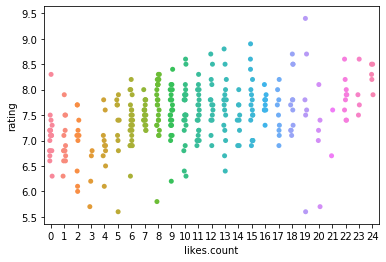

In [80]:
sns.stripplot(data=dfmstny[dfmstny['likes.count'] < 25],y='rating',x='likes.count')
#sns.yscale('likes.count', linthreshy=0.01)

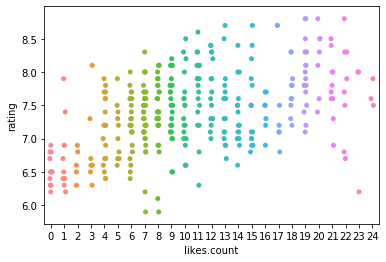

In [79]:
sns.stripplot(data=dfmsttn[dfmsttn['likes.count'] < 25],y='rating',x='likes.count')

<h3>Let create BAR Plot to analyse which price tier contributes higher user likes, photo count and distance</h3>

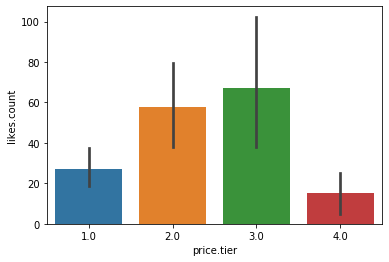

In [9]:
sns.barplot(data=dfmstny,y='likes.count',x='price.tier')

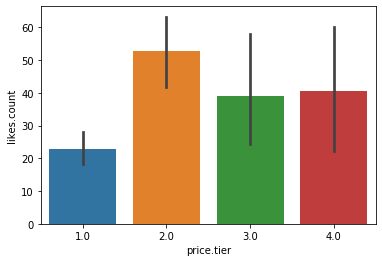

In [8]:
sns.barplot(data=dfmsttn,y='likes.count',x='price.tier')

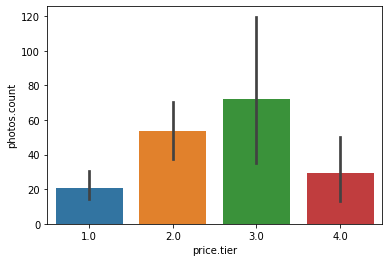

In [10]:
sns.barplot(data=dfmstny,y='photos.count',x='price.tier')

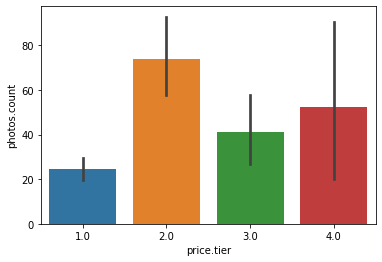

In [11]:
sns.barplot(data=dfmsttn,y='photos.count',x='price.tier')

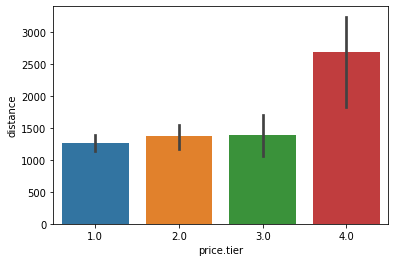

In [17]:
sns.barplot(data=dfmstny,y='distance',x='price.tier')

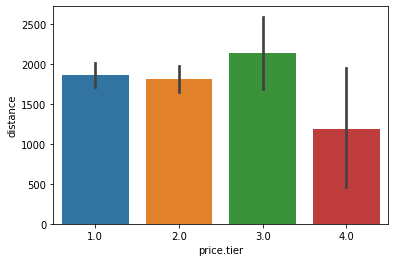

In [16]:
sns.barplot(data=dfmsttn,y='distance',x='price.tier')

<h3>Let us create Regression Plot to Analyse the correlation between user likes,rating and distance</h3>

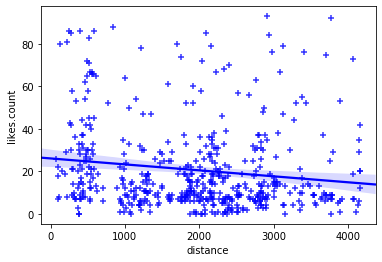

In [64]:
sns.regplot(data=dfmsttn[dfmsttn['likes.count'] < 100],x='distance',y='likes.count',marker='+',color='blue')

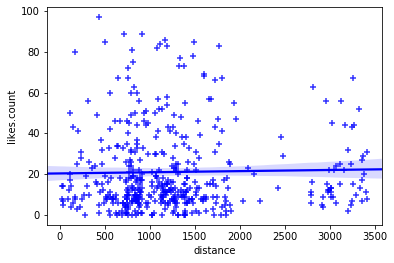

In [66]:
sns.regplot(data=dfmstny[dfmstny['likes.count'] < 100 ],x='distance',y='likes.count',marker='+',color='blue')

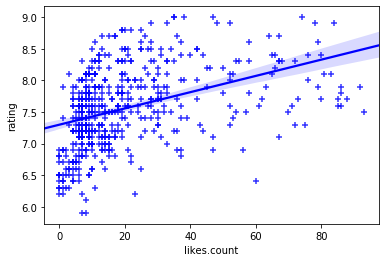

In [67]:
sns.regplot(data=dfmsttn[dfmsttn['likes.count'] < 100],x='likes.count',y='rating',marker='+',color='blue')

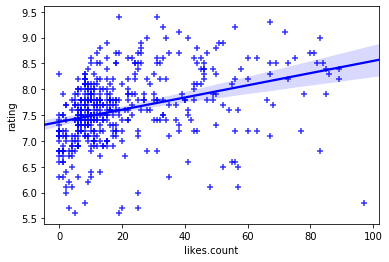

In [68]:
sns.regplot(data=dfmstny[dfmstny['likes.count'] < 100 ],x='likes.count',y='rating',marker='+',color='blue')

<h3>Lets create scatter plot for price tier 2 with user likes Vs Rating for Manhattan and Old City of Toronto</h3> 

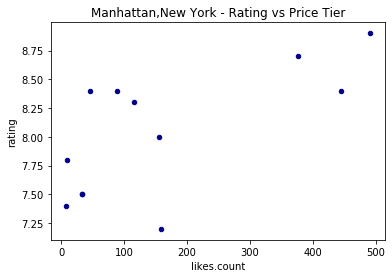

In [16]:
dfnyoct = dfmstny[(dfmstny['price.tier']==2.0) & (dfmstny['Borough']=='Manhattan')]
dfnyoct.plot.scatter(y='rating',x='likes.count',c='DarkBlue')
plt.title("Manhattan,New York - Rating vs Price Tier")
plt.show()

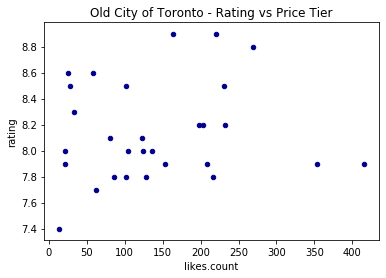

In [17]:
dftnoct = dfmsttn[(dfmsttn['price.tier']==2.0) & (dfmsttn['Borough']=='Old City of Toronto')]
dftnoct.plot.scatter(y='rating',x='likes.count',c='DarkBlue')
plt.title("Old City of Toronto - Rating vs Price Tier")
plt.show()

<h3>Let us frame rating wise Venue Category using cross tabulation for prie tier 2</h3>

In [18]:
crtptn1=pd.crosstab(dftnoct["categories"],dftnoct["rating"],margins=True,margins_name='Total')
crtptn1.sort_values(by='Total',ascending=False,inplace=True)
crtptn1.head(6)

rating,7.4,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.5,8.6,8.8,8.9,Total
categories,,,,,,,,,,,,,
Total,1,1,4,5,4,2,3,1,3,2,1,2,29
Bar,0,0,0,1,0,1,0,1,0,0,0,0,3
Vegetarian / Vegan Restaurant,1,0,0,0,0,0,0,0,0,2,0,0,3
Steakhouse,0,1,0,0,0,0,0,0,0,0,1,0,2
Tea Room,0,0,0,0,0,1,0,0,1,0,0,0,2
American Restaurant,0,0,1,1,0,0,0,0,0,0,0,0,2


In [21]:
crpny1=pd.crosstab(dfnyoct["categories"],dfnyoct["rating"],margins=True,margins_name='Total')
crpny1.sort_values(by='Total',ascending=False,inplace=True)
crpny1.head(6)

rating,7.2,7.4,7.5,7.8,8.0,8.3,8.4,8.7,8.9,Total
categories,,,,,,,,,,
Total,1,1,2,1,1,1,3,1,1,12
American Restaurant,0,0,1,0,0,0,0,0,1,2
Café,0,0,0,0,0,1,0,1,0,2
Bar,0,0,1,0,0,0,0,0,0,1
Burger Joint,0,0,0,0,1,0,0,0,0,1
Cocktail Bar,0,0,0,0,0,0,1,0,0,1


<h3>K-Means Clustering</h3>
<p>There are many methods for clustering out there. In this analysis, we will be presenting the model that is
considered the one of the simplest methods among them. Despite its simplicity, k-means is vastly used
for clustering in many data science applications, especially useful if you need to quickly discover
insights from unlabeled data. We will be using k-means for our venue segmentation</p>

<p>Lets create cluster and segmentation based on venue distance, user likes, rating, price tier, tips and photo count</p>

In [30]:
dfnykm=dfmstny[['id','lat','lng','categories','Borough','name','distance','price.tier','rating','likes.count','photos.count','tips.count']]
dftnkm=dfmsttn[['id','lat','lng','categories','Borough','name','distance','price.tier','rating','likes.count','photos.count','tips.count']]

dfnykm=dfnykm.dropna()
dftnkm=dftnkm.dropna()

dfnykm[['distance','price.tier','rating','likes.count','photos.count','tips.count']].describe().round(3)

,distance,price.tier,rating,likes.count,photos.count,tips.count
count,254.000,254.000,254.000,254.000,254.000,254.000
mean,1330.476,1.575,7.692,41.559,37.323,16.035
std,830.020,0.717,0.693,77.825,72.400,24.402
min,103.000,1.000,5.600,0.000,0.000,0.000
25%,796.750,1.000,7.300,9.000,6.000,4.000
50%,1133.000,1.000,7.700,16.000,14.000,7.000
75%,1550.500,2.000,8.200,40.750,35.000,19.000
max,3411.000,4.000,9.400,590.000,568.000,170.000


In [155]:
dfnykm.isnull().sum()

id              0
lat             0
lng             0
categories      0
Borough         0
name            0
distance        0
price.tier      0
rating          0
likes.count     0
photos.count    0
tips.count      0
Labels          0
dtype: int64

In [15]:
dftnkm[['distance','price.tier','rating','likes.count','photos.count','tips.count']].describe().round(3)

,distance,price.tier,rating,likes.count,photos.count,tips.count
count,351.000,351.000,351.000,351.000,351.000,351.000
mean,1851.330,1.652,7.654,37.610,47.698,16.174
std,1062.199,0.716,0.668,54.085,83.337,22.773
min,106.000,1.000,5.900,0.000,0.000,0.000
25%,963.500,1.000,7.200,9.000,7.000,4.000
50%,1932.000,2.000,7.700,18.000,18.000,8.000
75%,2638.000,2.000,8.100,37.000,51.500,18.000
max,4164.000,4.000,9.200,415.000,705.000,179.000


In [156]:
dftnkm.isnull().sum()

id              0
lat             0
lng             0
categories      0
Borough         0
name            0
distance        0
price.tier      0
rating          0
likes.count     0
photos.count    0
tips.count      0
Labels          0
dtype: int64

<h4>Let us find the exact number of clusters required using Elbow method</h4>

1 : 1524.0
2 : 977.1694448083578
3 : 773.4701874290904
4 : 620.000913310563
5 : 529.217431046429
6 : 459.6282590797108
7 : 424.66469874655706
8 : 371.48307681656183
9 : 340.77799861966867


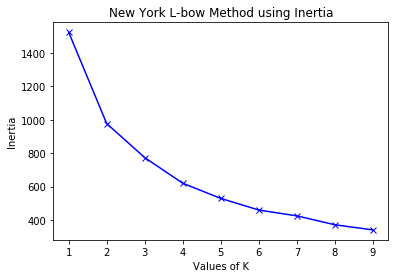

In [79]:

scaler = StandardScaler()
XNY = scaler.fit_transform(dfnykm[['distance','price.tier','rating','likes.count','photos.count','tips.count']])

nyinertias = [] 
nylbow = {} 
KNY = range(1,10) 
  
for k in KNY: 
    kmeanModel = KMeans(n_clusters=k).fit(XNY) 
    kmeanModel.fit(XNY)     
    nyinertias.append(kmeanModel.inertia_) 
    nylbow[k] = kmeanModel.inertia_ 

for key,val in nylbow.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(KNY, nyinertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('New York L-bow Method using Inertia') 
plt.show()

1 : 2106.0
2 : 1376.8030191067105
3 : 1113.688093479696
4 : 959.5128357457687
5 : 851.2573620077019
6 : 755.2522465880419
7 : 678.419889998936
8 : 622.195146281416
9 : 575.1292829803101


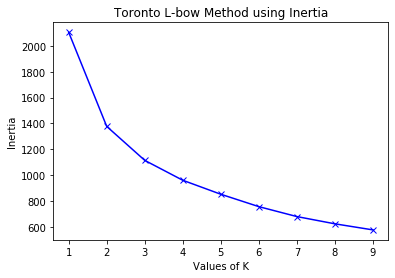

In [78]:

scaler = StandardScaler()
XTN = scaler.fit_transform(dftnkm[['distance','price.tier','rating','likes.count','photos.count','tips.count']])

tninertias = [] 
tnlbow = {} 
KTN = range(1,10) 
  
for k in KTN: 
    kmeanModel = KMeans(n_clusters=k).fit(XTN) 
    kmeanModel.fit(XTN)     
    tninertias.append(kmeanModel.inertia_) 
    tnlbow[k] = kmeanModel.inertia_ 

for key,val in tnlbow.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(KTN, tninertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Toronto L-bow Method using Inertia') 
plt.show() 

<h4>Let us fit the number of clusters as 3 basis the above observation and predict the cluster for each record</h4>

In [31]:
kmny = KMeans(n_clusters = 3)
kmny.fit(dfnykm[['distance','price.tier','rating','likes.count','photos.count','tips.count']])
predictionny = kmny.predict(dfnykm[['distance','price.tier','rating','likes.count','photos.count','tips.count']])
predictionny

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
kmtn = KMeans(n_clusters = 3)
kmtn.fit(dftnkm[['distance','price.tier','rating','likes.count','photos.count','tips.count']])
predictiontn = kmtn.predict((dftnkm[['distance','price.tier','rating','likes.count','photos.count','tips.count']]))
predictiontn

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1,

<h4>Let us apply the predicted cluster to the dataset with columns name as Labels and view the count for each cluster</h4>

In [33]:
dfnykm['Labels'] = predictionny
dfnykm['Labels'].value_counts()

2    113
0    105
1     36
Name: Labels, dtype: int64

In [34]:
dftnkm["Labels"] = predictiontn
dftnkm["Labels"].value_counts()

0    136
2    128
1     87
Name: Labels, dtype: int64

In [35]:
centroidny = dfnykm.groupby(["Labels"]).mean()
centroidny

,lat,lng,distance,price.tier,rating,likes.count,photos.count,tips.count
Labels,,,,,,,,
0,40.711326,-73.907402,1403.009524,1.571429,7.720952,40.590476,33.114286,12.885714
1,40.590627,-74.140919,3105.750000,1.750000,7.691667,26.305556,25.333333,15.527778
2,40.741714,-73.892849,697.504425,1.522124,7.664602,47.318584,45.053097,19.123894


In [36]:
centroidtn = dftnkm.groupby(["Labels"]).mean()
centroidtn

,lat,lng,distance,price.tier,rating,likes.count,photos.count,tips.count
Labels,,,,,,,,
0,43.722853,-79.354753,2067.698529,1.507353,7.532353,23.772059,33.500000,10.816176
1,43.669548,-79.506736,3236.586207,1.770115,7.616092,28.229885,36.758621,12.977011
2,43.694224,-79.368787,679.898438,1.726562,7.808594,58.687500,70.218750,24.039062


<h4>Let us visualize the three clusters and its centroids based on distance, rating, likes count and user tips</h4>

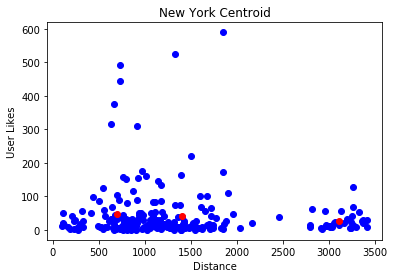

In [89]:
plt.scatter(dfnykm["distance"],dfnykm["likes.count"],c='blue')
plt.scatter(centroidny["distance"],centroidny["likes.count"],c='red')
plt.xlabel('Distance')
plt.ylabel('User Likes')
plt.title('New York Centroid')
plt.show()

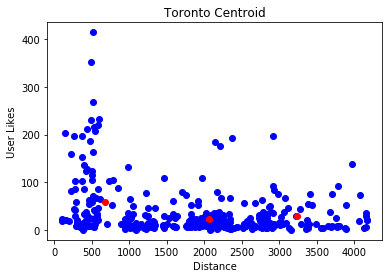

In [90]:
plt.scatter(dftnkm["distance"],dftnkm["likes.count"],c='blue')
plt.scatter(centroidtn["distance"],centroidtn["likes.count"],c='red')
plt.xlabel('Distance')
plt.ylabel('User Likes')
plt.title('Toronto Centroid')
plt.show()

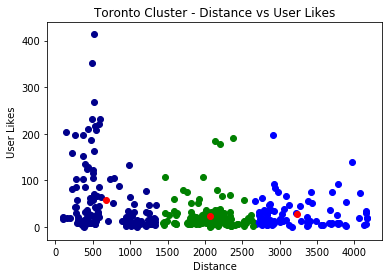

In [91]:
color=['blue','darkblue','green']
Kt=3
for k in range(Kt):
    datat=dftnkm[dftnkm["Labels"]==k]
    plt.scatter(datat["distance"],datat["likes.count"],c=color[k])

plt.scatter(centroidtn["distance"],centroidtn["likes.count"],c='red')
plt.xlabel('Distance')
plt.ylabel('User Likes')
plt.title("Toronto Cluster - Distance vs User Likes")
plt.show()

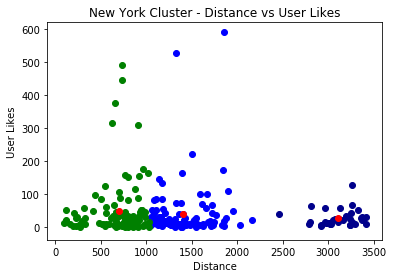

In [92]:
color=['blue','darkblue','green']
Ky=3
for k in range(Ky):
    datay=dfnykm[dfnykm["Labels"]==k]
    plt.scatter(datay["distance"],datay["likes.count"],c=color[k])

plt.scatter(centroidny["distance"],centroidny["likes.count"],c='red')
plt.xlabel('Distance')
plt.ylabel('User Likes')
plt.title("New York Cluster - Distance vs User Likes")
plt.show()

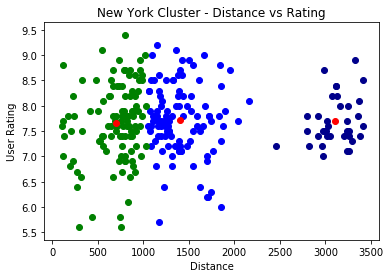

In [93]:
color=['blue','darkblue','green']
Ky=3
for k in range(Ky):
    datay=dfnykm[dfnykm["Labels"]==k]
    plt.scatter(datay["distance"],datay["rating"],c=color[k])

plt.scatter(centroidny["distance"],centroidny["rating"],c='red')
plt.xlabel('Distance')
plt.ylabel('User Rating')
plt.title("New York Cluster - Distance vs Rating")
plt.show()

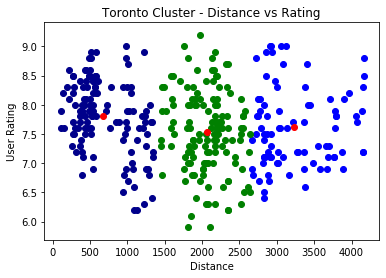

In [94]:
color=['blue','darkblue','green']
Kt=3
for k in range(Kt):
    datat=dftnkm[dftnkm["Labels"]==k]
    plt.scatter(datat["distance"],datat["rating"],c=color[k])

plt.scatter(centroidtn["distance"],centroidtn["rating"],c='red')
plt.xlabel('Distance')
plt.ylabel('User Rating')
plt.title("Toronto Cluster - Distance vs Rating")
plt.show()

<h3>Let us create the map of New York and Toronto using the Borough and Neighborhoods latitude and longitude</h3>

In [37]:
import folium
from geopy.geocoders import Nominatim

geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='Toronto'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude

toronto_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=10)

dftnnbs=dftnhcsvl.sample(n=100)

for lat, lng, label in zip(dftnbcsvl.Latitude, dftnbcsvl.Longitude, dftnbcsvl.Borough):
    folium.Marker(location = [lat, lng], popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(toronto_map)

for lat, lng, label in zip(dftnnbs.Latitude, dftnnbs.Longitude, dftnnbs.Neighborhood):
    folium.CircleMarker([lat, lng],radius=5, color='yellow', fill=True, popup=label,icon = folium.Icon(color='blue', icon='info-sign') ,fill_color='blue',fill_opacity=0.6).add_to(toronto_map)
 
    
toronto_map

In [45]:
import folium
from geopy.geocoders import Nominatim

geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='New York'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude

Newyork_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=10)

dfnynbs=dfnynhbcsvl.sample(n=50)

for lat, lng, label in zip(dfnybcsvl.Latitude, dfnybcsvl.Longitude, dfnybcsvl.Borough):
    folium.Marker(location = [lat, lng], popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(Newyork_map)

for lat, lng, label in zip(dfnynbs.Latitude, dfnynbs.Longitude, dfnynbs.Neighborhood):
    folium.CircleMarker([lat, lng],radius=5, color='yellow', fill=True, popup=label,icon = folium.Icon(color='blue', icon='info-sign') ,fill_color='blue',fill_opacity=0.6).add_to(Newyork_map)
     
# show map
Newyork_map

<h3>Let us create and view the location wise cluster in the New York City Map</h3>

In [49]:
geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='New York'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude

Newyork_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=10)

for lat, lng, label in zip(dfnybcsvl.Latitude, dfnybcsvl.Longitude, dfnybcsvl.Borough):
    folium.Marker(location = [lat, lng],popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(Newyork_map)

for lat, lng, label,idtn in zip(dfnykm.lat, dfnykm.lng, dfnykm.Borough,dfnykm.Labels):
    folium.CircleMarker([lat, lng],radius=4, color='yellow', fill=True, popup=label,fill_color='blue',fill_opacity=0.6).add_to(Newyork_map)
    
# show map
Newyork_map

In [50]:
geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='New York'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude

Newyork_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=10)

for lat, lng, label in zip(dfnybcsvl.Latitude, dfnybcsvl.Longitude, dfnybcsvl.Borough):
    folium.Marker(location = [lat, lng],popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(Newyork_map)

for lat, lng, label,idtn in zip(dfnykm.lat, dfnykm.lng, dfnykm.Borough,dfnykm.Labels):

    if idtn==0:
        folium.CircleMarker([lat, lng],radius=4, color='red', fill=True, popup=label,fill_color='red',fill_opacity=0.6).add_to(Newyork_map)
    elif idtn==1:
        folium.CircleMarker([lat, lng],radius=4, color='blue', fill=True, popup=label,fill_color='blue',fill_opacity=0.6).add_to(Newyork_map)
    elif idtn==2:
        folium.CircleMarker([lat, lng],radius=4, color='yellow', fill=True, popup=label,fill_color='yellow',fill_opacity=0.6).add_to(Newyork_map)   
    
# show map
Newyork_map

<h3>Let us create and view the location wise cluster in the City of Toronto Map</h3>

In [51]:
geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='Toronto'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude

toronto_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=10)

for lat, lng, label in zip(dftnbcsvl.Latitude, dftnbcsvl.Longitude, dftnbcsvl.Borough):
    folium.Marker(location = [lat, lng],popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(toronto_map)

for lat, lng, label,idtn in zip(dftnkm.lat, dftnkm.lng, dftnkm.Borough,dftnkm.Labels):
    folium.CircleMarker([lat, lng],radius=4, color='yellow', fill=True, popup=label,fill_color='blue',fill_opacity=0.6).add_to(toronto_map)

toronto_map

In [52]:
geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()

adrs='Toronto'
location = geolocator.geocode(adrs)
tlatitude = location.latitude
tlongitude = location.longitude

toronto_map = folium.Map(location=[tlatitude,tlongitude], zoom_start=10)

for lat, lng, label in zip(dftnbcsvl.Latitude, dftnbcsvl.Longitude, dftnbcsvl.Borough):
    folium.Marker(location = [lat, lng],popup = label,icon = folium.Icon(color='darkblue', icon='star')).add_to(toronto_map)

for lat, lng, label,idtn in zip(dftnkm.lat, dftnkm.lng, dftnkm.Borough,dftnkm.Labels):

    if idtn==0:
        folium.CircleMarker([lat, lng],radius=4, color='red', fill=True, popup=label,fill_color='red',fill_opacity=0.6).add_to(toronto_map)
    elif idtn==1:
        folium.CircleMarker([lat, lng],radius=4, color='yellow', fill=True, popup=label,fill_color='yellow',fill_opacity=0.6).add_to(toronto_map)
    else:
        folium.CircleMarker([lat, lng],radius=4, color='blue', fill=True, popup=label,fill_color='blue',fill_opacity=0.6).add_to(toronto_map)   
    
toronto_map

<h3> Results and Discussion </h3>
<p>The summary of the exploratory analysis of the two cities are plotted below.
    
•New York City has high neighborhoods which is 47% higher compared to Toronto City.
•New York Venue has 48.8K user likes higher by 47% compared to Toronto 26K user likes.
•The major contributors of user likes are Manhattan with 73% and old city of Toronto 59%.
•Compared to Toronto, New York Venue User Tips higher by 12% and Photo count by 45%.
•The average rating and price tier are Similar for both the cities with marginal difference.
•Similarities for both the cities, where there is a positive correlation between venue user likes vs rating and negative correlation between distance vs user likes.
•The centroid mean value for price tier is similar for both cities with value 1.5 and 1.7 and the mean value for ratings are similar for both cities with the range 7.5 to 7.8

We have also observed similarities in our regression plots on user likes and ratings for both the cities. 
The visualization shows positive correlation, when the user likes increase’s the rating also is in increasing trend for
both the cities and also visualized a negative correlation in terms of user likes and distance for both the cities

In clustering of venues, we have observed the maximum user likes found between the range 0 to 200 for both the cities
w.r.t user likes and distance and also maximum rating found between range 7.0 to 8.5 w.r.t rating and distance for both
the cities, which indicates the centroids of the cluster may change whenever there is a change in the user likes
at the venues.</p>




<h3>Conclusion</h3>

<p>In this exploration, we have analyzed the effectiveness of venue user likes, photo count, user tips, distance and rating. We have compared the venues at both the cities and analysis revealed strong similarities on the venue user likes and ratings for the both the cities and dissimilarities when compared with distance and user likes.The visualization of regression plots showed us a positive correlation with user likes and rating. We have analyzed the venues of both the cities at various parameters, there are similarities and dissimilarities observed at both the cities.</p>


<p>Thank You</p>